In [1]:
import matplotlib.patches as patches
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import numpy as np
import pandas as pd
from matplotlib import gridspec
import matplotlib.lines as mlines
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

COMMON_MODEL = ['CMCC-ESM2', 'CESM2-WACCM','NorESM2-MM', 'TaiESM1', 'EC-Earth3-Veg','CMCC-CM2-SR5', 'BCC-CSM2-MR', 'obs']
CALS = ['rh', 'soc']
MODEL_INPUT_PATH = "F:/007-2_MMWM_data_CMIP6"
OUTPUT_PATH = "E:/Drought_And_SOC/res/figs/Supplementary"

CONTINENT_DICT = {
    'Asia': 0,
    'North America': 1,
    'Europe': 2,
    'Africa': 3,
    'South America': 4,
    'Oceania': 5
}

In [2]:
def plot_supplementary_fig2a(fig, ax, cal, continent):
    weight_path = f"{MODEL_INPUT_PATH}/{continent}_{cal}_distance_matrix.csv"

    norm = Normalize(vmin=0, vmax=2.2)

    ax.tick_params(axis='x', labelsize=16)  # 设置 x 轴刻度字体大小
    ax.tick_params(axis='y', labelsize=16)  # 设置 y 轴刻度字体大小

     # 调整布局，为底部的图例留出空间
    plt.subplots_adjust(bottom=0.25)

    # 读取数据
    independence_df = pd.read_csv(weight_path, index_col=0)

    # 确保模型顺序一致
    independence_df = independence_df.loc[COMMON_MODEL, COMMON_MODEL]

    # 创建矩阵数据
    n = len(COMMON_MODEL)
    independence_data = independence_df.values

    # 绘制矩阵
    for i in range(n):
        for j in range(n):
            value = independence_data[i, j]
            color = plt.cm.YlGnBu(norm(value))
            rect = patches.Rectangle((j, i), 1, 1, linewidth=1, edgecolor='gray',facecolor=color, alpha=0.8)
            ax.add_patch(rect)
            if value < 1.5:
                # 添加数值标签
                ax.text(j + 0.5, i + 0.5, f'{value:.3f}',ha='center', va='center', fontsize=15, color='black')
            else:
                ax.text(j + 0.5, i + 0.5, f'{value:.3f}',ha='center', va='center', fontsize=15, color='white')

    # 设置坐标轴
    ax.set_xticks(np.arange(n) + 0.5)
    ax.set_yticks(np.arange(n) + 0.5)
    if continent == 'South America' or continent == 'Oceania':
        ax.set_xticklabels(COMMON_MODEL, rotation=45, ha='right', fontsize=18)
    else:
        ax.set_xticklabels([])  # 不显示x轴标签

    if continent == 'South America' or continent == 'Asia' or continent == 'Europe':
        ax.set_yticklabels(COMMON_MODEL, fontsize=18)
    else:
        ax.set_yticklabels([])  # 不显示y轴标签

    # 设置轴标签
    if continent != 'Oceania':
        ax.set_title(f"{continent}", fontsize=20)
    else:
        ax.set_title(f"Australia", fontsize=20)

    # 添加网格
    ax.set_xticks(np.arange(n+1), minor=True)
    ax.set_yticks(np.arange(n+1), minor=True)
    ax.grid(which='minor', color='gray', linestyle='-', linewidth=1)

    # 设置轴范围
    ax.set_xlim(0, n)
    ax.set_ylim(0, n)
    ax.invert_yaxis()  # 矩阵通常左上角为(0,0)

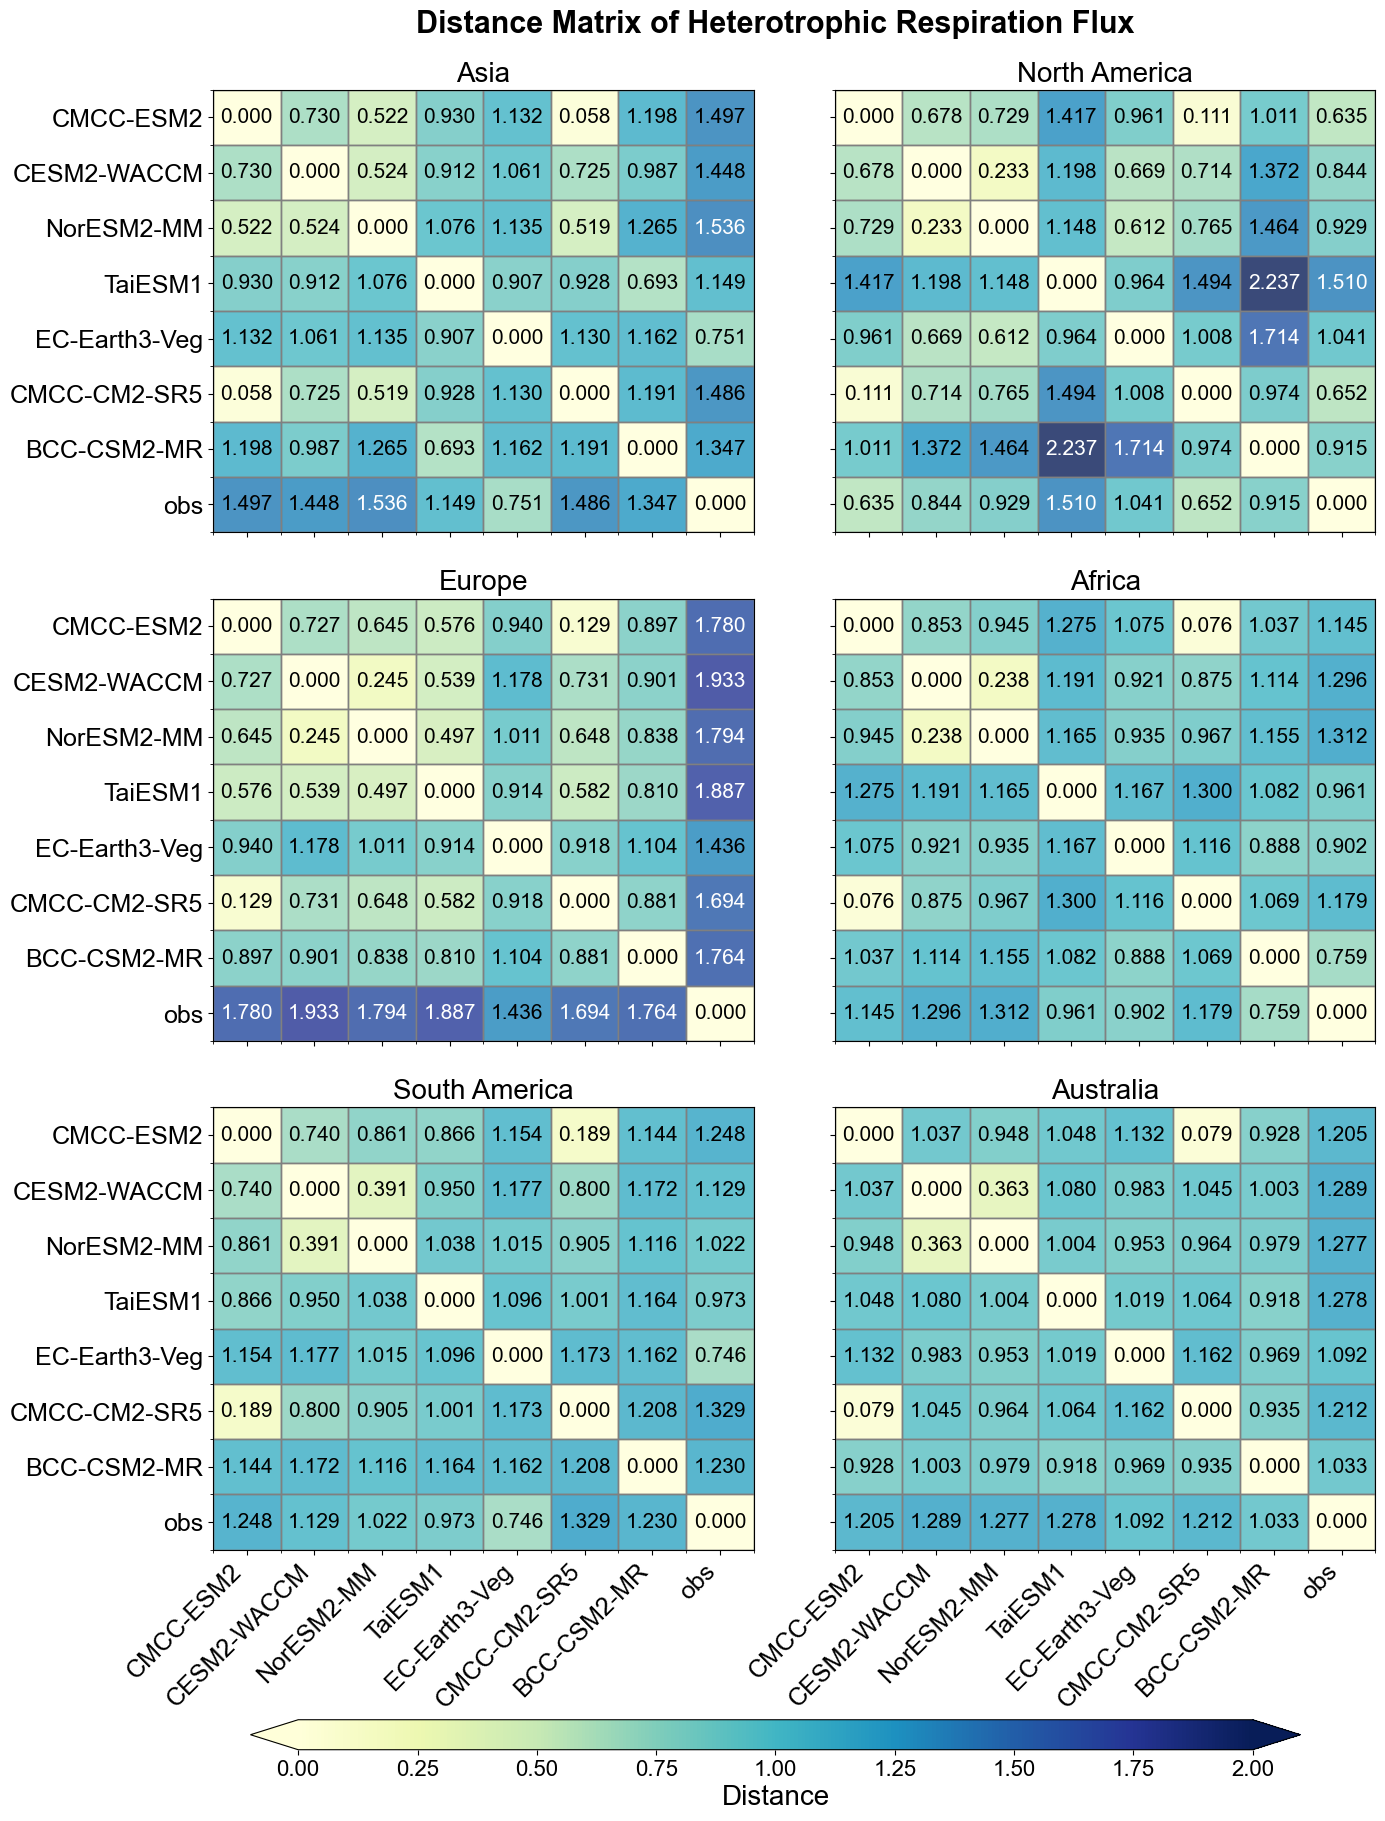

In [3]:
def create_supplementary_fig2():
    plt.rcParams.update({
        'font.family': 'serif',           # 主字体类型（serif衬线 / sans-serif无衬线）
        'font.serif': ['Arial'], # 衬线字体首选
        'font.sans-serif': ['Times New Roman'],      # 无衬线字体备选
    })
    # 创建图形和子图布局
    fig = plt.figure(figsize=(15, 20))
    for key, value in dict(CONTINENT_DICT).items():
        # 创建m×n的子图布局（根据实际需求调整）
        gs = gridspec.GridSpec(3, 2, figure=fig)
        ax = fig.add_subplot(gs[value])
        plot_supplementary_fig2a(fig, ax, 'rh', key)
    plt.subplots_adjust(wspace=0.15, hspace=0.15, bottom=0.15)
    fig.suptitle("Distance Matrix of Heterotrophic Respiration Flux", fontsize=22, fontweight='bold', y=0.92)

    # 添加统一的colorbar
    cbar_ax = fig.add_axes([0.15, 0.05, 0.7, 0.015])  # [left, bottom, width, height]
    norm = Normalize(vmin=0, vmax=2.0)
    sm = ScalarMappable(cmap=plt.cm.YlGnBu, norm=norm)
    sm.set_array([])

    # 创建水平colorbar
    cbar = fig.colorbar(sm, cax=cbar_ax, orientation='horizontal', extend='both')
    cbar.set_label('Distance', fontsize=20)
    cbar.ax.tick_params(labelsize=16)  # 设置colorbar刻度字体大小

    plt.show()


if __name__ == '__main__':
    create_supplementary_fig2()

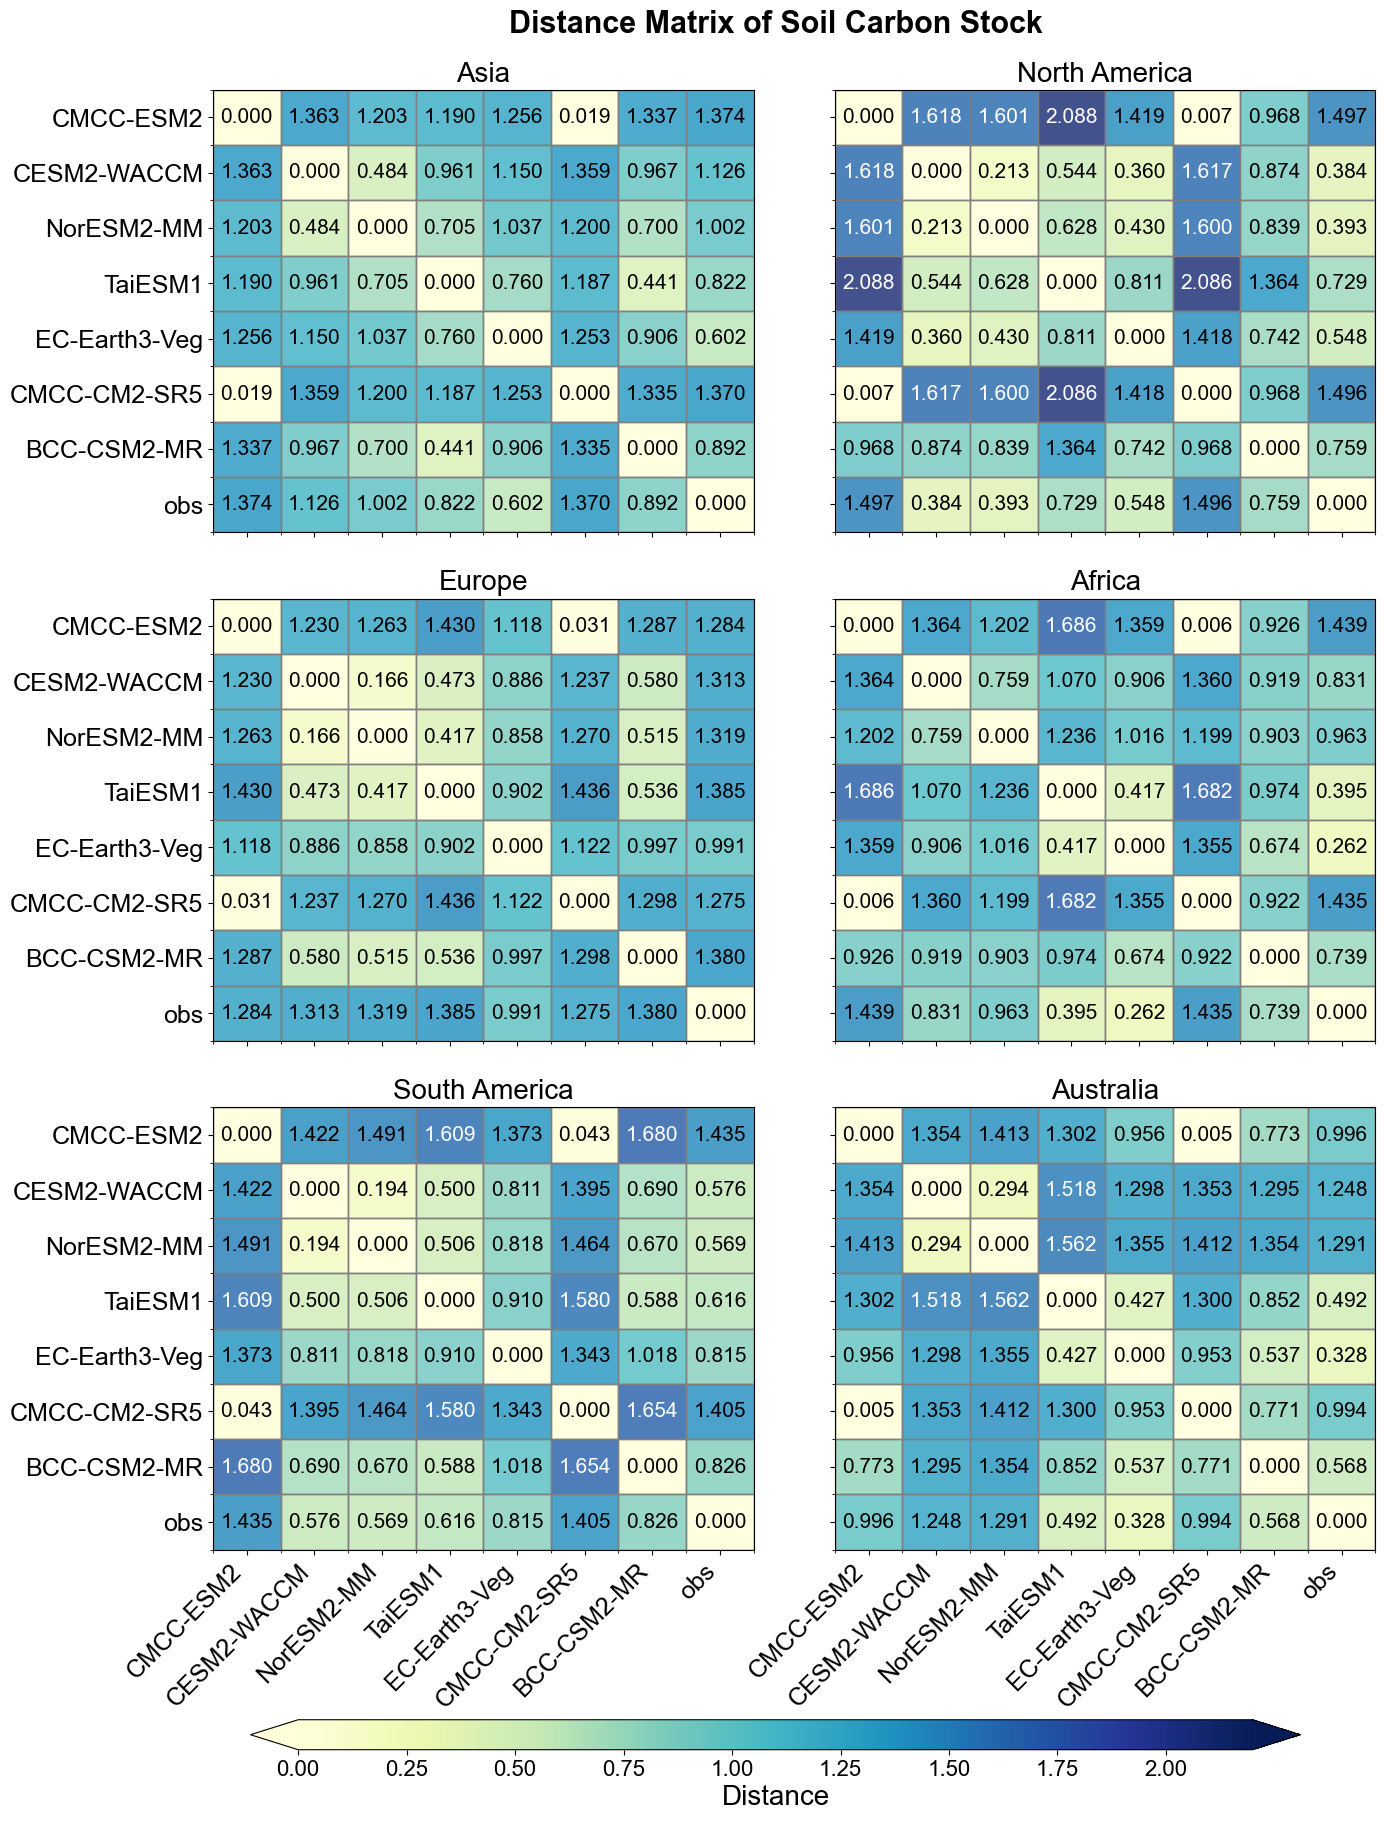

In [4]:
def create_supplementary_fig4():
    plt.rcParams.update({
        'font.family': 'serif',           # 主字体类型（serif衬线 / sans-serif无衬线）
        'font.serif': ['Arial'], # 衬线字体首选
        'font.sans-serif': ['Times New Roman'],      # 无衬线字体备选
    })
    # 创建图形和子图布局
    fig = plt.figure(figsize=(15, 20))
    for key, value in dict(CONTINENT_DICT).items():
        # 创建m×n的子图布局（根据实际需求调整）
        gs = gridspec.GridSpec(3, 2, figure=fig)
        ax = fig.add_subplot(gs[value])
        plot_supplementary_fig2a(fig, ax, 'soc', key)
    plt.subplots_adjust(wspace=0.15, hspace=0.15, bottom=0.15)
    fig.suptitle("Distance Matrix of Soil Carbon Stock", fontsize=22, fontweight='bold', y=0.92)

    # 添加统一的colorbar
    cbar_ax = fig.add_axes([0.15, 0.05, 0.7, 0.015])  # [left, bottom, width, height]
    norm = Normalize(vmin=0, vmax=2.2)
    sm = ScalarMappable(cmap=plt.cm.YlGnBu, norm=norm)
    sm.set_array([])

    # 创建水平colorbar
    cbar = fig.colorbar(sm, cax=cbar_ax, orientation='horizontal', extend='both')
    cbar.set_label('Distance', fontsize=20)
    cbar.ax.tick_params(labelsize=16)  # 设置colorbar刻度字体大小

    plt.show()


if __name__ == '__main__':
    create_supplementary_fig4()